# Pandas 101
In this tutorial you will learn why Pandas are so great to use. We will go through a brief description of available data structures, useful functions available, and how to view and manipulate data. 

----------------------------

### Why do you need Pandas?

- Finding/looking for trends in data
- Business analytics
- cleaning data
- blending multiple data sources
- easy data manipulation to making awesome models!



----------------------------

Let's import some packages -- these are modules with specific functionalities to make your life easier

In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


## Data Structures and Viewing Data

There are several data structures available in pandas including series (time series), data frames, and panels. You can think of each of these as a lower dimensio of the one on its right: so a data frame is a container for series and panels are a container for data frames. This allows to have flexibility when cleaning/munging data. 

In [2]:
# let's make a series
s0 = pd.Series([3,6,10, 30, np.nan, -10, 4])
print(s0)

0     3.0
1     6.0
2    10.0
3    30.0
4     NaN
5   -10.0
6     4.0
dtype: float64


In [3]:
# data frames can handle different types of data 
rng = 8
df0 = pd.DataFrame({'A': 25,
                   'date':pd.date_range('10/12/2018', periods=rng, freq='H'),
                    'random_data': pd.Series(np.random.randn(rng)),
                    'favorite desserts': ['chocolate chip cookies', 'chocolate cake', 'chocolate', 'ice cream', 
                                                        'alfajores','merengue','apple pie','madeline'], 
                    'user': 'iqt staff'
                    
})

In [4]:
# what types of data are in this data frame?
df0.dtypes

A                             int64
date                 datetime64[ns]
random_data                 float64
favorite desserts            object
user                         object
dtype: object

In [5]:
# this is small data frame, so we can take a look at all the data in the data frame
df0

,A,date,random_data,favorite desserts,user
0,25,2018-10-12 00:00:00,-1.455330,chocolate chip cookies,iqt staff
1,25,2018-10-12 01:00:00,-0.973525,chocolate cake,iqt staff
2,25,2018-10-12 02:00:00,1.447552,chocolate,iqt staff
3,25,2018-10-12 03:00:00,0.462311,ice cream,iqt staff
4,25,2018-10-12 04:00:00,1.603128,alfajores,iqt staff
5,25,2018-10-12 05:00:00,-0.571291,merengue,iqt staff
6,25,2018-10-12 06:00:00,1.520136,apple pie,iqt staff
7,25,2018-10-12 07:00:00,0.418416,madeline,iqt staff


In [6]:
# Most of the times the data we load can be large so we look at a subset
# default is first 5 entries
df0.head()

,A,date,random_data,favorite desserts,user
0,25,2018-10-12 00:00:00,-1.455330,chocolate chip cookies,iqt staff
1,25,2018-10-12 01:00:00,-0.973525,chocolate cake,iqt staff
2,25,2018-10-12 02:00:00,1.447552,chocolate,iqt staff
3,25,2018-10-12 03:00:00,0.462311,ice cream,iqt staff
4,25,2018-10-12 04:00:00,1.603128,alfajores,iqt staff


In [7]:
# or last five entries
df0.tail()

,A,date,random_data,favorite desserts,user
3,25,2018-10-12 03:00:00,0.462311,ice cream,iqt staff
4,25,2018-10-12 04:00:00,1.603128,alfajores,iqt staff
5,25,2018-10-12 05:00:00,-0.571291,merengue,iqt staff
6,25,2018-10-12 06:00:00,1.520136,apple pie,iqt staff
7,25,2018-10-12 07:00:00,0.418416,madeline,iqt staff


In [ ]:
#but you can adjust as you see fit


In [8]:
# you can also define other types of indixing (nominal is 0 to (n-1) as you saw above) 
dates = pd.date_range('20180101', periods=6)
dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df1 = pd.DataFrame(np.random.rand(6, 5), index=dates, columns = list('ABCDE'))
df1

,A,B,C,D,E
2018-01-01,0.886754,0.015693,0.963731,0.803435,0.820093
2018-01-02,0.835932,0.353896,0.375302,0.845155,0.084416
2018-01-03,0.938092,0.758601,0.363221,0.035526,0.924800
2018-01-04,0.349261,0.959686,0.296081,0.527958,0.605050
2018-01-05,0.279808,0.378598,0.662994,0.841749,0.074591
2018-01-06,0.669857,0.716705,0.318305,0.163971,0.317151


##### There are also several functions available to operate on df

In [10]:
# how many items?
df1['A'].count()

6

In [11]:
# what is the total sum of a column?
df1['B'].sum()

3.183180110821274

In [66]:
# or all columns?
df1.sum()

A    3.959703
B    3.183180
C    2.979635
D    3.217794
E    2.826100
dtype: float64

In [ ]:
# want to see other attributes available? type df1.<TAB>


In [12]:
# ... and if the function you are looking for is not available, then just apply it!
df1.apply(np.cumsum)

,A,B,C,D,E
2018-01-01,0.886754,0.015693,0.963731,0.803435,0.820093
2018-01-02,1.722686,0.369590,1.339033,1.648590,0.904508
2018-01-03,2.660778,1.128191,1.702254,1.684115,1.829308
2018-01-04,3.010039,2.087877,1.998336,2.212074,2.434358
2018-01-05,3.289846,2.466475,2.661330,3.053823,2.508949
2018-01-06,3.959703,3.183180,2.979635,3.217794,2.826100


In [13]:
df1.apply(lambda x: x.max() -x.min())

A    0.658285
B    0.943993
C    0.667649
D    0.809629
E    0.850209
dtype: float64

##### Viweing index, column names

In [14]:
df1.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df1.columns

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

##### We can also get some quick data statistics

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2018-01-01 to 2018-01-06
Freq: D
Data columns (total 5 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
E    6 non-null float64
dtypes: float64(5)
memory usage: 448.0 bytes


In [17]:
df1.describe()

,A,B,C,D,E
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.659950,0.530530,0.496606,0.536299,0.471017
std,0.283163,0.343567,0.264726,0.360423,0.367703
min,0.279808,0.015693,0.296081,0.035526,0.074591
25%,0.429410,0.360072,0.329534,0.254968,0.142599
50%,0.752894,0.547652,0.369262,0.665697,0.461101
75%,0.874048,0.748127,0.591071,0.832171,0.766332
max,0.938092,0.959686,0.963731,0.845155,0.924800


In [18]:
df1.corr()

,A,B,C,D,E
A,1.000000,-0.325123,0.119481,-0.277404,0.470389
B,-0.325123,1.000000,-0.866442,-0.687400,0.128503
C,0.119481,-0.866442,1.000000,0.572244,0.172647
D,-0.277404,-0.687400,0.572244,1.000000,-0.480369
E,0.470389,0.128503,0.172647,-0.480369,1.000000


In [19]:
df1.mean()

A    0.659950
B    0.530530
C    0.496606
D    0.536299
E    0.471017
dtype: float64

In [20]:
df1['C'].mean()

0.49660581954917227

In [21]:
df1.mean(1)

2018-01-01    0.697941
2018-01-02    0.498940
2018-01-03    0.604048
2018-01-04    0.547607
2018-01-05    0.447548
2018-01-06    0.437198
Freq: D, dtype: float64

##### Data frame sorting

In [22]:
# switch order of columns
df1.sort_index(axis=1, ascending=False)


,E,D,C,B,A
2018-01-01,0.820093,0.803435,0.963731,0.015693,0.886754
2018-01-02,0.084416,0.845155,0.375302,0.353896,0.835932
2018-01-03,0.924800,0.035526,0.363221,0.758601,0.938092
2018-01-04,0.605050,0.527958,0.296081,0.959686,0.349261
2018-01-05,0.074591,0.841749,0.662994,0.378598,0.279808
2018-01-06,0.317151,0.163971,0.318305,0.716705,0.669857


In [23]:
# sort values based on data on a specific column
df1.sort_values('D', ascending = False) # ascending or decending

,A,B,C,D,E
2018-01-02,0.835932,0.353896,0.375302,0.845155,0.084416
2018-01-05,0.279808,0.378598,0.662994,0.841749,0.074591
2018-01-01,0.886754,0.015693,0.963731,0.803435,0.820093
2018-01-04,0.349261,0.959686,0.296081,0.527958,0.605050
2018-01-06,0.669857,0.716705,0.318305,0.163971,0.317151
2018-01-03,0.938092,0.758601,0.363221,0.035526,0.924800


## Selecting Data

In [24]:
# select a column
df1.A

2018-01-01    0.886754
2018-01-02    0.835932
2018-01-03    0.938092
2018-01-04    0.349261
2018-01-05    0.279808
2018-01-06    0.669857
Freq: D, Name: A, dtype: float64

In [25]:
df1['A']

2018-01-01    0.886754
2018-01-02    0.835932
2018-01-03    0.938092
2018-01-04    0.349261
2018-01-05    0.279808
2018-01-06    0.669857
Freq: D, Name: A, dtype: float64

In [26]:
# select a range of rows
df1[:3]

,A,B,C,D,E
2018-01-01,0.886754,0.015693,0.963731,0.803435,0.820093
2018-01-02,0.835932,0.353896,0.375302,0.845155,0.084416
2018-01-03,0.938092,0.758601,0.363221,0.035526,0.924800


In [27]:
# you can also select by index values
df1['20180102':'20180104']

,A,B,C,D,E
2018-01-02,0.835932,0.353896,0.375302,0.845155,0.084416
2018-01-03,0.938092,0.758601,0.363221,0.035526,0.924800
2018-01-04,0.349261,0.959686,0.296081,0.527958,0.605050


In [28]:
# you can select by location 
df1.iloc[2]

A    0.938092
B    0.758601
C    0.363221
D    0.035526
E    0.924800
Name: 2018-01-03 00:00:00, dtype: float64

In [29]:
# choose a subset of data by specifing range of columns and rows (very numpy/python like)
df1.iloc[[1,3,5],[0,3]]

,A,D
2018-01-02,0.835932,0.845155
2018-01-04,0.349261,0.527958
2018-01-06,0.669857,0.163971


In [30]:
df1.iloc[1:3,3:4]

,D
2018-01-02,0.845155
2018-01-03,0.035526


#### Look at specific conditions and masks

In [66]:
df1[df1.B> 0.7]

,A,B,C,D,E
2018-01-01,0.808458,0.716406,0.371451,0.642990,0.491269
2018-01-05,0.777569,0.836080,0.600509,0.002549,0.165120


In [31]:
df2 = df1.copy()

In [67]:
# Let's add a new column
df2['F'] = ['USA', 'Colombia', 'Spain', 'Greece', 'USA', 'Mexico']
df2['G'] = [np.nan, 15, np.nan, np.nan, 20, 3]

In [68]:
df2.head()

,A,B,C,D,E,F,G
2018-01-01,0.886754,0.015693,0.963731,0.803435,0.820093,USA,NaN
2018-01-02,0.835932,0.353896,0.375302,0.845155,0.084416,Colombia,15.0
2018-01-03,0.938092,0.758601,0.363221,0.035526,0.924800,Spain,NaN
2018-01-04,0.349261,0.959686,0.296081,0.527958,0.605050,Greece,NaN
2018-01-05,0.279808,0.378598,0.662994,0.841749,0.074591,USA,20.0


In [69]:
# unique entries for a given column
df2.F.unique()

array(['USA', 'Colombia', 'Spain', 'Greece', 'Mexico'], dtype=object)

In [121]:
list(df2.F.unique())

['USA', 'Colombia', 'Spain', 'Greece', 'Mexico']

In [70]:
df2[df2['F'].isin(['USA','Mexico'])]

,A,B,C,D,E,F,G
2018-01-01,0.886754,0.015693,0.963731,0.803435,0.820093,USA,NaN
2018-01-05,0.279808,0.378598,0.662994,0.841749,0.074591,USA,20.0
2018-01-06,0.669857,0.716705,0.318305,0.163971,0.317151,Mexico,3.0


what do to with missing values?

In [73]:
# drop (you can set threshold limits, drop colmuns)
df2[df2['F'].isin(['USA','Mexico'])].dropna()

,A,B,C,D,E,F,G
2018-01-05,0.279808,0.378598,0.662994,0.841749,0.074591,USA,20.0
2018-01-06,0.669857,0.716705,0.318305,0.163971,0.317151,Mexico,3.0


In [74]:
# fill na with values
df2.fillna(0)

,A,B,C,D,E,F,G
2018-01-01,0.886754,0.015693,0.963731,0.803435,0.820093,USA,0.0
2018-01-02,0.835932,0.353896,0.375302,0.845155,0.084416,Colombia,15.0
2018-01-03,0.938092,0.758601,0.363221,0.035526,0.924800,Spain,0.0
2018-01-04,0.349261,0.959686,0.296081,0.527958,0.605050,Greece,0.0
2018-01-05,0.279808,0.378598,0.662994,0.841749,0.074591,USA,20.0
2018-01-06,0.669857,0.716705,0.318305,0.163971,0.317151,Mexico,3.0


In [35]:
# you can include multiple conditions
df2[(df2['F'].isin(['USA','Mexico'])) & (df2['C'] > 0.5)]

,A,B,C,D,E,F
2018-01-01,0.886754,0.015693,0.963731,0.803435,0.820093,USA
2018-01-05,0.279808,0.378598,0.662994,0.841749,0.074591,USA


In [119]:
df2.groupby('F').mean()

,A,B,C,D,E
F,,,,,
Colombia,0.850028,0.472906,0.535652,0.449025,0.859379
Greece,0.333862,0.117793,0.217359,0.966229,0.783245
Mexico,0.976225,0.560905,0.618140,0.492255,0.900870
Spain,0.255794,0.694306,0.698964,0.321702,0.305020
USA,0.793013,0.776243,0.485980,0.322770,0.328195


In [122]:
df2['C'][df2.F == 'Spain']

2018-01-03    0.698964
Freq: D, Name: C, dtype: float64

In [123]:
df2[df2.F == 'USA'].B

2018-01-01    0.716406
2018-01-05    0.836080
Freq: 4D, Name: B, dtype: float64

## Loading Data

Pandas can load various types of files: xls, csv, txt, json, hdf5, sql .... 

In [ ]:
#type pd.read<TAB> to see all the options


This is a VERY well known data set, the dataset has three classes of iris flowers, 50 instances of each.
Data Attributes:
- s_len : sepal length in cm
- s_width : sepal width in cm
- p_len : petal length in cm
- p_width : petal width in cm
- IrisC: Iris class -->  Iris Setosa, Iris Versicolour, Iris Virginica

TASK: based on date, classify iris type

In [37]:
iris = pd.read_csv('datasets/Iris.csv')
iris.head()

,s_len,s_width,p_len,p_w,IrisC
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
s_len      150 non-null float64
s_width    150 non-null float64
p_len      150 non-null float64
p_w        150 non-null float64
IrisC      150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,s_len,s_width,p_len,p_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
iris.corr()

,s_len,s_width,p_len,p_w
s_len,1.000000,-0.117570,0.871754,0.817941
s_width,-0.117570,1.000000,-0.428440,-0.366126
p_len,0.871754,-0.428440,1.000000,0.962865
p_w,0.817941,-0.366126,0.962865,1.000000


In [40]:
# what are the unique iris classes?
iris.IrisC.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

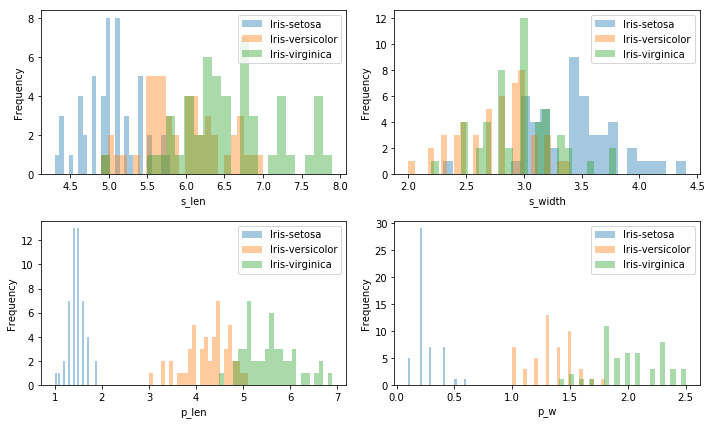

In [43]:
# histogram 

nbins=25
# <fill in below> : list of columns to plot 
colnames=list(iris.columns[0:4]) # list of col names to plot

f, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axs=axs.ravel() 
for i,ax in enumerate(axs):
    ax.figure
    # <fill in below> : select a specific column, for each iris class
    ax.hist(iris[colnames[i]][iris.IrisC=='Iris-setosa'], bins=nbins, alpha=0.4, label='Iris-setosa')
    ax.hist(iris[colnames[i]][iris.IrisC=='Iris-versicolor'], bins=nbins, alpha=0.4, label='Iris-versicolor')
    ax.hist(iris[colnames[i]][iris.IrisC=='Iris-virginica'], bins=nbins, alpha=0.4, label='Iris-virginica')
    ax.legend(loc='upper right')
    ax.set_xlabel(colnames[i])
    ax.set_ylabel('Frequency')
plt.tight_layout()

In [44]:
# what is the mean sepal lenght, sepal width, petal lenght, and petal width for each iris class?
iris.groupby('IrisC').mean()

,s_len,s_width,p_len,p_w
IrisC,,,,
Iris-setosa,5.006,3.428,1.462,0.246
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


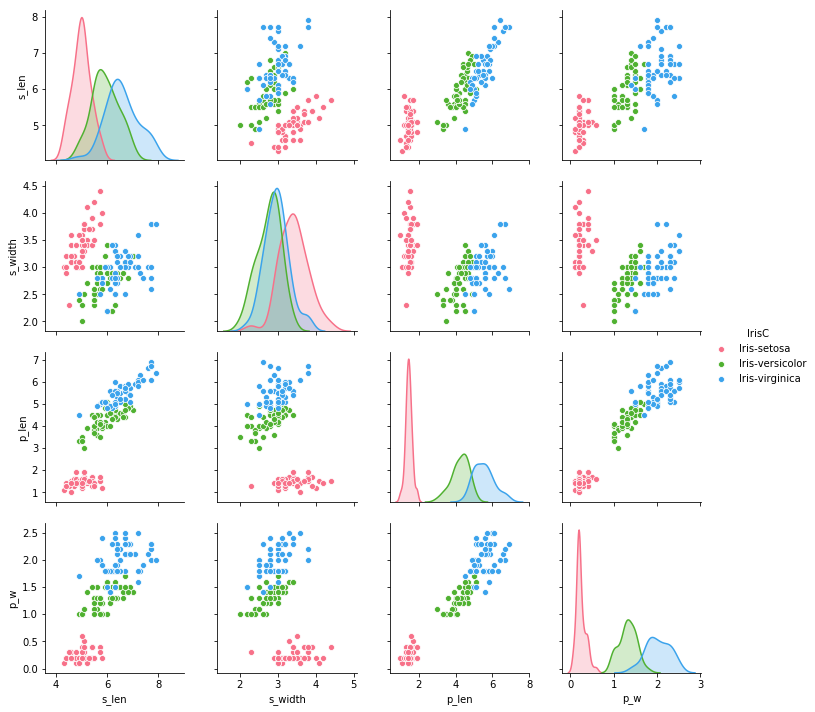

In [51]:
# plots
sns.pairplot(iris, hue = 'IrisC', palette= 'husl')

## Let's practice what we learned

[VOiCES](https://voices18.github.io/) is an audio dataset put together in collaboration between Lab41 and SRI.
Data is provided in wav files, but for fun I've extracted some features from a subset of the data. 

In [52]:
voices = pd.read_csv('./datasets/VOiCES_90deg_features.csv')
voices.head()


,room,noise,Speaker,mic_id,mic_type,location,spk_angle,Gender,DataSet,Centroid,...,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,roll_off_max,roll_off_min
0,1,musi,5126,7,stu,beh,90,M,train-clean-360,1369.398345,...,-19.780722,8.274728,-8.022123,0.586187,-12.076546,-0.450236,-3.663054,-10.178352,2267.065004,175.390908
1,1,none,3549,3,stu,mid,90,F,train-clean-360,2009.319289,...,-24.670042,-2.313114,-16.068898,4.275575,-0.543397,5.348371,-3.721555,1.623454,3150.364701,379.463243
2,2,babb,4331,7,stu,beh,90,F,train-clean-360,1164.829415,...,-21.554743,-14.068063,-6.621132,-14.529982,-8.319861,-0.395488,-3.755954,-9.381570,1765.189656,251.926294
3,2,tele,196,1,stu,clo,90,M,train-clean-100,1609.693173,...,-22.227656,6.975141,-13.284871,-11.583312,0.705184,-6.407151,-10.479363,-7.361547,2532.617001,264.891274
4,2,musi,2289,3,stu,mid,90,M,train-clean-100,2058.137285,...,-29.806671,26.878554,-15.679705,10.373796,-1.904526,6.741255,-1.635499,-3.869155,3264.408186,295.557505


In [53]:
voices.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 27 columns):
room            4096 non-null int64
noise           4096 non-null object
Speaker         4096 non-null int64
mic_id          4096 non-null int64
mic_type        4096 non-null object
location        4096 non-null object
spk_angle       4096 non-null int64
Gender          4096 non-null object
DataSet         4096 non-null object
Centroid        4096 non-null float64
variance        4096 non-null float64
skewness        4096 non-null float64
kurtosis        4096 non-null float64
mfcc1           4096 non-null float64
mfcc2           4096 non-null float64
mfcc3           4096 non-null float64
mfcc4           4096 non-null float64
mfcc5           4096 non-null float64
mfcc6           4096 non-null float64
mfcc7           4096 non-null float64
mfcc8           4096 non-null float64
mfcc9           4096 non-null float64
mfcc10          4096 non-null float64
mfcc11          4096 non-null fl

In [54]:
voices.describe()


,room,Speaker,mic_id,spk_angle,Centroid,variance,skewness,kurtosis,mfcc1,mfcc2,...,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,roll_off_max,roll_off_min
count,4096.000000,4096.000000,4096.000000,4096.0,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,...,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
mean,1.500000,3924.015625,4.000000,90.0,1661.738969,1478.151514,1846.267046,2200.252933,-302.274888,135.322976,...,-19.739777,2.489604,-14.415792,-5.868783,-7.184822,-2.619034,-5.441512,-6.379128,2681.974866,288.819853
std,0.500061,2781.992478,2.236341,0.0,323.282020,152.300830,138.954451,128.187016,31.965732,18.396419,...,10.218901,10.461162,8.563248,8.068022,6.648379,5.837547,5.346953,5.285814,524.177324,89.479639
min,1.000000,83.000000,1.000000,90.0,873.782626,998.995973,1385.448222,1771.041971,-431.293771,71.285723,...,-50.055808,-36.501196,-49.173392,-27.741027,-27.199248,-23.203370,-22.153866,-21.270400,1326.987493,112.703600
25%,1.000000,1268.750000,2.500000,90.0,1437.164048,1382.914600,1758.960011,2120.981412,-323.241957,123.049466,...,-27.217149,-4.019385,-19.813713,-11.737609,-11.643138,-6.622703,-9.245014,-10.075630,2314.868956,224.661825
50%,1.500000,3980.500000,4.000000,90.0,1636.409416,1481.397328,1844.931271,2196.717028,-302.837164,136.005029,...,-19.265299,2.281686,-14.164433,-6.002367,-7.551522,-2.603387,-5.650400,-6.533956,2651.959041,275.733565
75%,2.000000,6338.000000,5.500000,90.0,1860.929739,1575.494467,1931.762684,2276.294073,-281.734136,148.000827,...,-12.549569,8.498091,-8.671322,-0.331543,-3.113734,1.284646,-1.799247,-2.805610,3030.689639,336.603473
max,2.000000,8635.000000,7.000000,90.0,2704.351186,2165.136338,2515.531112,2810.649686,-180.630591,190.252638,...,16.797211,41.530383,7.255857,19.649625,17.446494,16.390635,12.080619,13.193112,4540.569513,856.673974


In [55]:
voices.corr()

,room,Speaker,mic_id,spk_angle,Centroid,variance,skewness,kurtosis,mfcc1,mfcc2,...,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,roll_off_max,roll_off_min
room,1.000000,0.000000,0.000000,NaN,-0.222002,-0.169073,-0.157335,-0.128403,-0.248425,0.133813,...,0.322041,0.043932,0.239439,-0.158788,0.183090,0.103786,-0.155718,-0.041650,-0.199331,-0.257672
Speaker,0.000000,1.000000,0.000000,NaN,-0.089836,-0.135676,-0.134857,-0.118703,0.056361,0.072757,...,0.094505,-0.075049,0.099882,-0.007990,-0.040097,0.049374,-0.030207,-0.062471,-0.104883,-0.055256
mic_id,0.000000,0.000000,1.000000,NaN,-0.193419,-0.171866,-0.169135,-0.155202,0.082814,0.168182,...,-0.031415,-0.114247,0.110385,-0.106577,0.106822,-0.007145,0.245430,0.081324,-0.180820,-0.150047
spk_angle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Centroid,-0.222002,-0.089836,-0.193419,NaN,1.000000,0.843725,0.708783,0.498285,0.306253,-0.873151,...,-0.589797,0.384895,-0.432306,0.326593,-0.000455,0.142058,0.009564,-0.079832,0.981916,0.790954
variance,-0.169073,-0.135676,-0.171866,NaN,0.843725,1.000000,0.961831,0.840745,0.220207,-0.816684,...,-0.500336,0.502573,-0.393328,0.448279,-0.039858,0.145974,0.054712,-0.081802,0.891880,0.437749
skewness,-0.157335,-0.134857,-0.169135,NaN,0.708783,0.961831,1.000000,0.956048,0.139160,-0.721781,...,-0.423628,0.542721,-0.391120,0.514809,-0.069482,0.123734,0.060925,-0.073006,0.751081,0.307755
kurtosis,-0.128403,-0.118703,-0.155202,NaN,0.498285,0.840745,0.956048,1.000000,0.040669,-0.553527,...,-0.283591,0.521711,-0.354883,0.552943,-0.120674,0.100767,0.052694,-0.073923,0.536738,0.127746
mfcc1,-0.248425,0.056361,0.082814,NaN,0.306253,0.220207,0.139160,0.040669,1.000000,-0.146512,...,-0.439868,0.122860,-0.220524,0.052874,-0.097918,-0.115604,-0.108908,-0.188172,0.304495,0.259635
mfcc2,0.133813,0.072757,0.168182,NaN,-0.873151,-0.816684,-0.721781,-0.553527,-0.146512,1.000000,...,0.400645,-0.197045,0.380229,-0.264127,-0.120771,-0.164208,-0.079571,0.006296,-0.874787,-0.699756


In [56]:
len(voices.columns[9:])

18

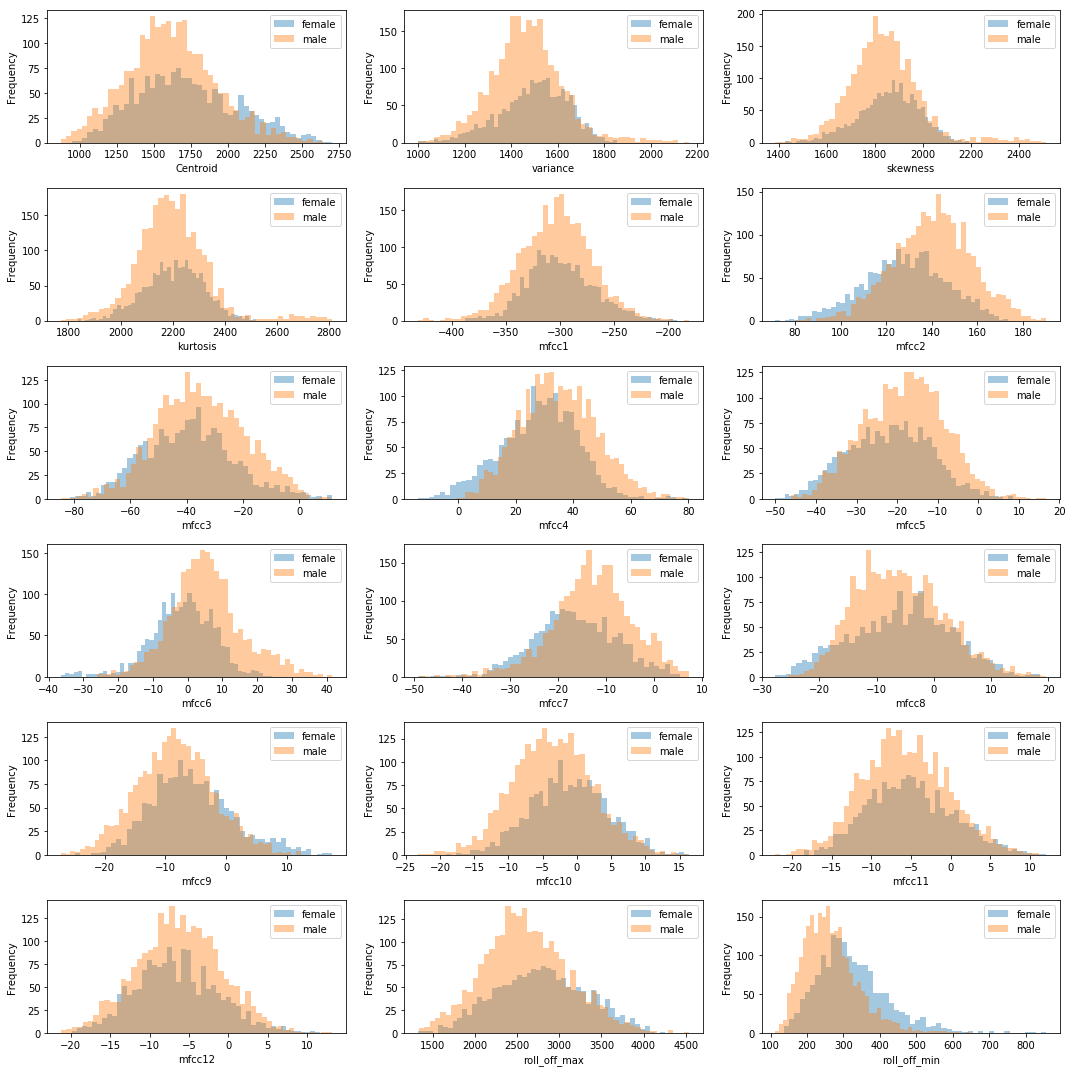

In [57]:
nbins=50

colnames=list(voices.columns[9:]) # list of col names to plot
f, axs = plt.subplots(nrows=6, ncols=3, figsize=(15,15))
axs=axs.ravel() 
for i,ax in enumerate(axs):
    ax.figure
    ax.hist(voices[colnames[i]][voices.Gender=='F'], bins=nbins, alpha=0.4, label='female')
    ax.hist(voices[colnames[i]][voices.Gender=='M'], bins=nbins, alpha=0.4, label='male')
    ax.legend(loc='upper right')
    ax.set_xlabel(colnames[i])
    ax.set_ylabel('Frequency')
plt.tight_layout()

In [138]:
noise = voices.noise.unique()
print(noise)

['musi' 'none' 'babb' 'tele']


In [144]:
print('number of females:', voices[voices['Gender'] == 'F'].Gender.count() )
print('number of males:', voices[voices['Gender'] == 'M'].Gender.count())

number of females: 1664
number of males: 2432


In [84]:
voices.groupby(['noise','Gender']).noise.count()

noise  Gender
babb   F         416
       M         608
musi   F         416
       M         608
none   F         416
       M         608
tele   F         416
       M         608
Name: noise, dtype: int64

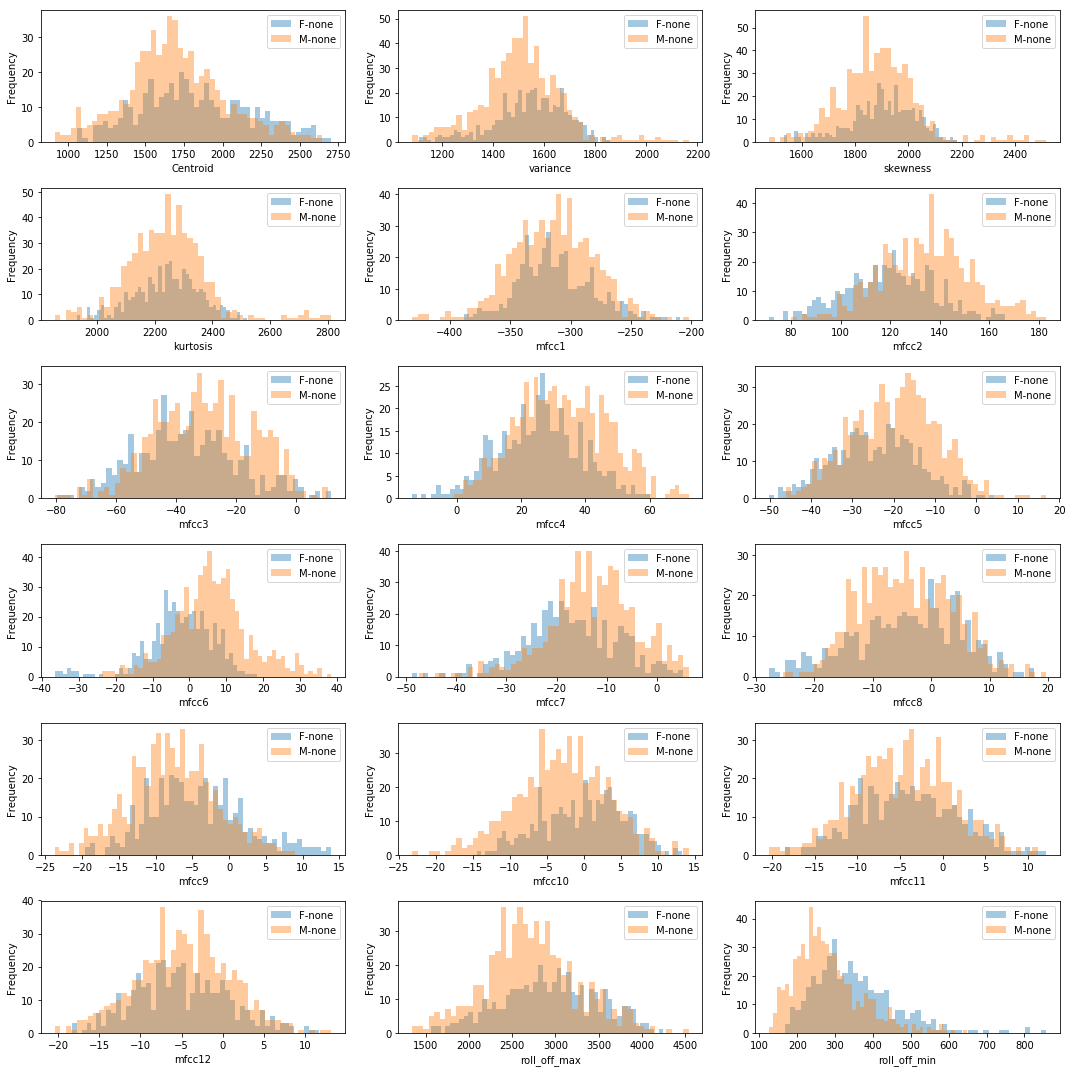

In [146]:
nbins=50

colnames=list(voices.columns[9:]) # list of col names to plot
f, axs = plt.subplots(nrows=6, ncols=3, figsize=(15,15))
axs=axs.ravel() 
for i,ax in enumerate(axs):
    ax.figure
    ax.hist(voices[colnames[i]][(voices.Gender=='F') & (voices.noise == 'none')], bins=nbins, alpha=0.4, label='F-none')
    ax.hist(voices[colnames[i]][(voices.Gender=='M') & (voices.noise == 'none')], bins=nbins, alpha=0.4, label='M-none')
    ax.legend(loc='upper right')
    ax.set_xlabel(colnames[i])
    ax.set_ylabel('Frequency')
plt.tight_layout()

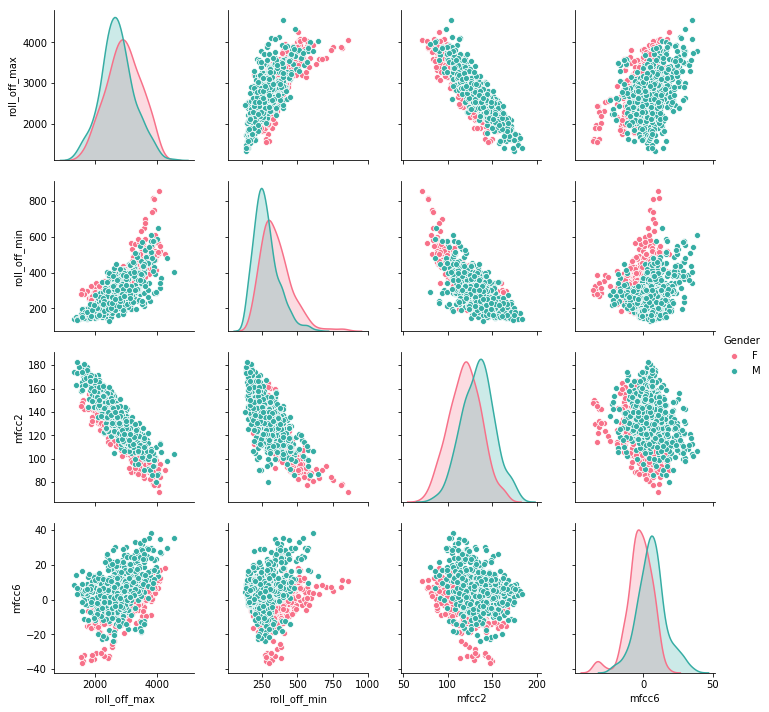

In [62]:
sns.pairplot(voices[voices.noise == 'none'], hue = 'Gender', palette= 'husl', 
             vars = ['roll_off_max', 'roll_off_min', 'mfcc2','mfcc6'])

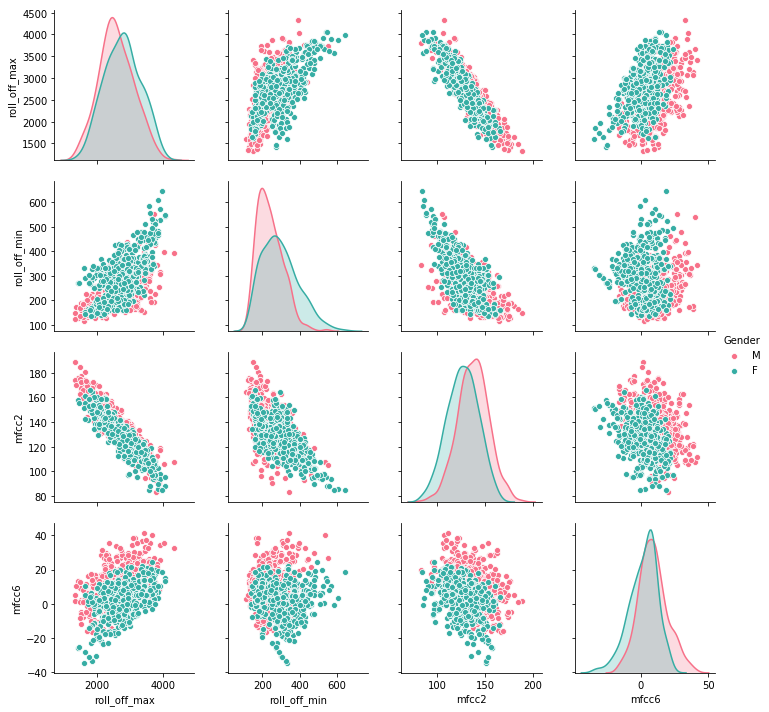

In [64]:
sns.pairplot(voices[voices.noise == 'musi'], hue = 'Gender', palette= 'husl', 
             vars = ['roll_off_max', 'roll_off_min', 'mfcc2','mfcc6'])

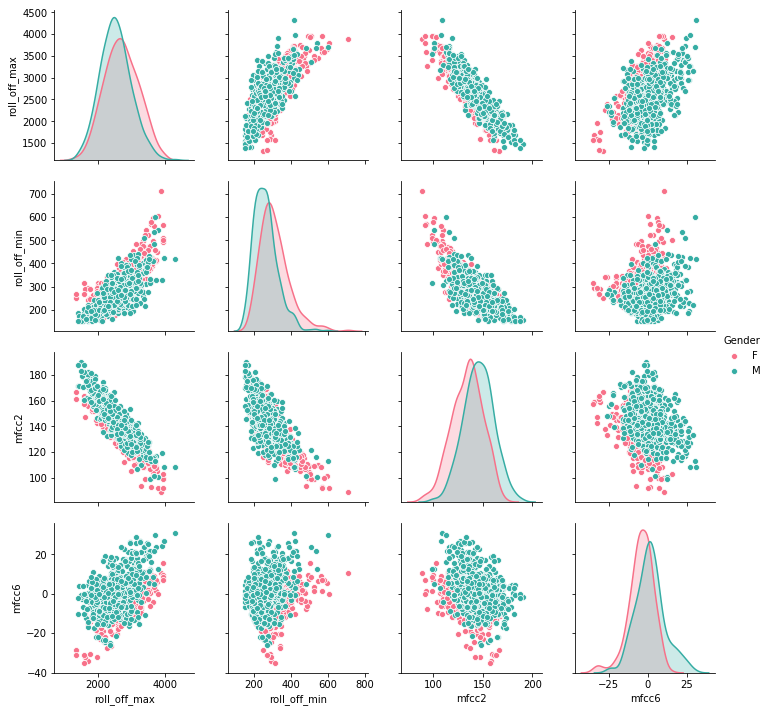

In [63]:
sns.pairplot(voices[voices.noise == 'babb'], hue = 'Gender', palette= 'husl', 
             vars = ['roll_off_max', 'roll_off_min', 'mfcc2','mfcc6'])

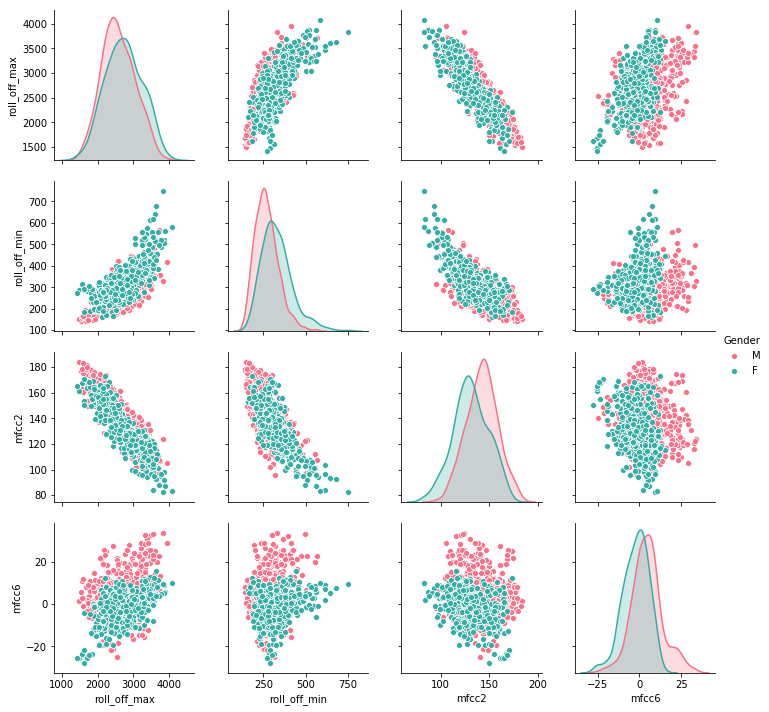

In [65]:
sns.pairplot(voices[voices.noise == 'tele'], hue = 'Gender', palette= 'husl', 
             vars = ['roll_off_max', 'roll_off_min', 'mfcc2','mfcc6'])